This notebook does...
wkeug
$1+1 \neq 2^2$, $\gamma$
slih
$$\sum_{i = 1}^\infty$$
kwrfg

I use the package `numpy` to...

```
import numpy as np
```

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the class is labeled 'target' in the data file
test_val_data = pd.read_csv('~/Documents/MooreLab/test_validate_data.csv', sep=',', dtype=np.float64)
features = test_val_data.drop('phenotype', axis=1).values

tv_training_features, tv_testing_features, tv_training_target, tv_testing_target = \
            train_test_split(features, test_val_data['phenotype'].values, random_state=42)

# Average CV score on the training set was:0.5596198830409357
exported_pipeline = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.1, min_samples_leaf=18, min_samples_split=20, n_estimators=100)
exported_pipeline.fit(tv_training_features, tv_training_target)


## From here downwards, we don't really do anything w TRAINING data, only visualize on test_target & test_features
print(exported_pipeline.score(tv_testing_features, tv_testing_target)) # Score of ML pipeline on test data (features & target)

results = exported_pipeline.predict(tv_testing_features)               # Predicted 0 or 1 for each participant

0.5507487520798668


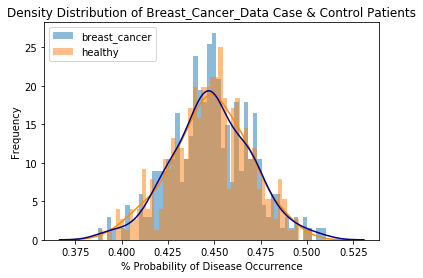

In [58]:
tv_testing_features_cancer = tv_testing_features[tv_testing_target == 1,:]             # All the rows with phenotype 1
tv_testing_features_healthy = tv_testing_features[tv_testing_target != 1,:]           # All the rows without phenotype 1


tv_prob_test_healthy = exported_pipeline.predict_proba(tv_testing_features_healthy)    # Predict_proba of these features
tv_prob_test_phenotype_healthy = tv_prob_test_healthy[:,1]                             # Extract correct probability of phenotype =1

tv_prob_test_cancer = exported_pipeline.predict_proba(tv_testing_features_cancer)
tv_prob_test_phenotype_cancer = tv_prob_test_cancer[:,1]

plt.hist(tv_prob_test_phenotype_cancer, bins = 50, alpha=0.5, label='breast_cancer', density=True)
plt.hist(tv_prob_test_phenotype_healthy, bins = 50, alpha=0.5, label='healthy', density=True)
sns.distplot(tv_prob_test_phenotype_healthy, hist=False, kde=True, 
             bins=50, color = 'darkorange')
sns.distplot(tv_prob_test_phenotype_cancer, hist=False, kde=True, 
             bins=50, color = 'darkblue')
plt.legend(loc='upper left')
plt.xlabel('% Probability of Disease Occurrence')
plt.ylabel('Frequency')
plt.title('Density Distribution of Breast_Cancer_Data Case & Control Patients')
plt.show()


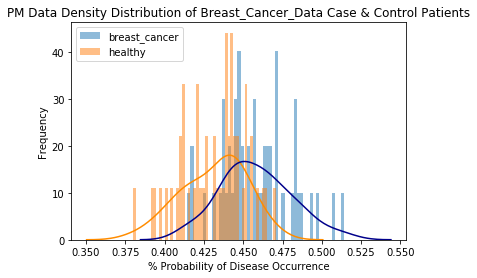

In [59]:
# Load precision medicine dataset; visualize density distribution of healthy & cancer cases

premed_100data = pd.read_csv('~/Documents/MooreLab/premed.csv', sep=',', dtype=np.float64)

healthy_50 = premed_100data.loc[premed_100data.phenotype == 0, :]
features_pm_healthy_50 = healthy_50.drop('phenotype', axis=1).values 

cancer_50 = premed_100data.loc[premed_100data.phenotype != 0, :]
features_pm_cancer_50 = cancer_50.drop('phenotype', axis=1).values         

pm_prob_test_healthy_50 = exported_pipeline.predict_proba(features_pm_healthy_50)   
pm_prob_test_phenotype_healthy_50 = pm_prob_test_healthy_50[:,1]                            
pm_prob_test_cancer_50 = exported_pipeline.predict_proba(features_pm_cancer_50)
pm_prob_test_phenotype_cancer_50 = pm_prob_test_cancer_50[:,1]

plt.hist(pm_prob_test_phenotype_cancer_50, bins = 50, alpha=0.5, label='breast_cancer', density=True)
plt.hist(pm_prob_test_phenotype_healthy_50, bins = 50, alpha=0.5, label='healthy', density=True)
sns.distplot(pm_prob_test_phenotype_healthy_50, hist=False, kde=True, 
             bins=50, color = 'darkorange')
sns.distplot(pm_prob_test_phenotype_cancer_50, hist=False, kde=True, 
             bins=50, color = 'darkblue')
plt.legend(loc='upper left')
plt.xlabel('% Probability of Disease Occurrence')
plt.ylabel('Frequency')
plt.title('PM Data Density Distribution of Breast_Cancer_Data Case & Control Patients')
plt.show()

In [65]:
# Changing each SNP and seeing resulting predict_proba difference in an array of ONE individual

list_of_SNPs = ['rs616488', 'rs11249433', 'rs4849887', 'rs2016394', 'rs1550623', 'rs6762644', 'rs4973768', 'rs1053338', 'rs1353747', 'rs1432679', 'rs204247', 'rs11977670', 'rs720475', 'rs9693444', 'rs11780156', 'rs1011970', 'rs7072776', 'rs704010', 'rs7904519', 'rs11199914', 'rs3817198', 'rs17356907', 'rs1292011', 'rs999737', 'rs11627032', 'rs13329835', 'rs1436904', 'rs3760982', 'rs2823093']
participant_table = []
for row in range(0, premed_100data.shape[0]):
    
    #inner loop
    all_info = []
    val = premed_100data.loc[row,:].drop('phenotype').values
    trlarr = np.array(val).reshape(1, -1)
    original_prob = exported_pipeline.predict_proba(trlarr)[:,1] # 0.43042119

    mylistup = []
    for snp in range(0,val.size):
        newval = val
        newval[snp] = (newval[snp] + 1) % 3
        rlarr = np.array(newval).reshape(1, -1)
        valtostore = exported_pipeline.predict_proba(rlarr)[:,1]
        mylistup.append(valtostore[0])
    upbumplist = mylistup - original_prob
    uplist = upbumplist.tolist()

    mylistdown = []
    for snp in range(0,val.size):
        newval = val
        newval[snp] = (newval[snp] - 1) % 3
        rlarr = np.array(newval).reshape(1, -1)
        valtostore = exported_pipeline.predict_proba(rlarr)[:,1]
        mylistdown.append(valtostore[0])
    downbumplist = mylistdown - original_prob
    downlist = downbumplist.tolist()
    list_ogprob = [0]

    completelist = uplist + downlist + list_ogprob
    min_value = min(completelist)
    best_prob = min_value + original_prob

    min_index = completelist.index(min_value) 
    if (min_index == 59):
        all_info.append(row)
        all_info.append(original_prob)
        all_info.append(best_prob)
        all_info.append("N/A")
    else:
        actual_SNP_index = min_index % 29
        all_info.append(row) 
        all_info.append(original_prob[0])
        all_info.append(best_prob[0])
        all_info.append(list_of_SNPs[actual_SNP_index])
        all_info.append(val[actual_SNP_index])
        if (min_index <= 29):
            all_info.append((val[actual_SNP_index] + 1) % 3)
        else:
            all_info.append((val[actual_SNP_index] - 1) % 3)
    
    participant_table.append(all_info)
    
participant_table

[[0, 0.4412510675705273, 0.4412510675705273, 'rs2823093', 1.0, 0.0],
 [1, 0.45483634240086784, 0.41768813094408075, 'rs7904519', 1.0, 2.0],
 [2, 0.40143168637658766, 0.3887207648017639, 'rs3760982', 1.0, 0.0],
 [3, 0.42017382452287855, 0.42017382452287855, 'rs2823093', 1.0, 0.0],
 [4, 0.38013301497542984, 0.38013301497542984, 'rs2823093', 2.0, 1.0],
 [5, 0.46377807836137824, 0.4453204259329522, 'rs720475', 0.0, 1.0],
 [6, 0.4107796176875167, 0.4028891578729029, 'rs17356907', 0.0, 2.0],
 [7, 0.4457851460811692, 0.3925162742829802, 'rs204247', 0.0, 1.0],
 [8, 0.44268344269989635, 0.42760443598782927, 'rs1550623', 1.0, 2.0],
 [9, 0.41139296634738315, 0.40144741070658535, 'rs3760982', 2.0, 1.0],
 [10, 0.43920177072799604, 0.41638544894357066, 'rs1353747', 1.0, 2.0],
 [11, 0.4217839528312001, 0.4201429527502419, 'rs616488', 0.0, 1.0],
 [12, 0.4337919695855199, 0.40466007806733695, 'rs9693444', 2.0, 0.0],
 [13, 0.4310074912312438, 0.41495288737897973, 'rs17356907', 2.0, 1.0],
 [14, 0.4264692

In [119]:
# then go to precision medicine dataset, grab ONE individual, 
# run pipeline i.e prob_test_of_one_patient_in_premeddataset = exported_pipeline.predict_proba(the one participant's 29 SNP)
# see where that patient falls in the density plot

# Array of initial risk scores
temp = premed_100data.drop('phenotype', axis=1).values 
Aarr = exported_pipeline.predict_proba(temp)[:,1]
# print(Aarr)

.485 #initial risk score

Barr = []
# changing the 0th SNP, rs616488, of all participants, measure effect
for row in range(0,100):
    change = premed_100data.loc[row,:]
    if (change[0] == 2):
        change[0] = 0
    else: change[0] += 1
    val = change.drop('phenotype').values
    arr = np.array(val)
    rlarr = arr.reshape(1, -1)
    onevalarray = exported_pipeline.predict_proba(rlarr)[:,1]
    valtostore = onevalarray[0]
    Barr.append(valtostore)

# print(Barr)

Carr = []
for row in range(0,100):
    change = premed_100data.loc[row,:]
    if (change[0] == 2):
        change[0] = 0
    else: change[0] += 1
    val = change.drop('phenotype').values
    arr = np.array(val)
    rlarr = arr.reshape(1, -1)
    onevalarray = exported_pipeline.predict_proba(rlarr)[:,1]
    valtostore = onevalarray[0]
    Carr.append(valtostore)

# print(Carr)

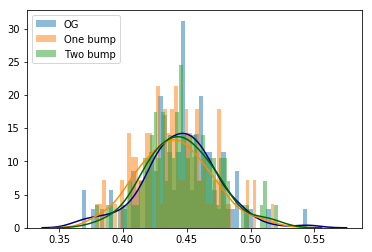

In [121]:
plt.hist(Aarr, bins = 50, alpha=0.5, label='OG', density=True)
plt.hist(Barr, bins = 50, alpha=0.5, label='One bump', density=True)
plt.hist(Carr, bins = 50, alpha=0.5, label='Two bump', density=True)
sns.distplot(Aarr, hist=False, kde=True, 
             bins=50, color = 'darkblue')
sns.distplot(Barr, hist=False, kde=True, 
             bins=50, color = 'darkorange')
sns.distplot(Carr, hist=False, kde=True, 
             bins=50, color = 'darkgreen')
plt.legend(loc='upper left')
plt.show()